In [1]:
'''Creacion del Modelo'''

'Creacion del Modelo'

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''Cargamos la comuna 1'''
df1 = pd.read_csv("comuna_1_dummies.csv",encoding="utf-8")
df1 = df1.drop(df1[df1.surface_total_in_m2 <13].index)
df1.drop(df1[(df1["surface_total_in_m2"]>10000)].index,inplace=True)
df1.sample(frac=1)

,Unnamed: 0,Unnamed: 0.1,BARRIO,COMUNA,ID,property_type,place_name,country_name,state_name,lat-lon,...,dis_espver,dis_clubes,dis_comisarias,dis_bomberos,dis_colegios,dis_restaurants,dis_subtes,dis_gym,dis_hospitales,dis_universidades
1212,1212,10894,MONSERRAT,1.0,16526,apartment,Monserrat,Argentina,Capital Federal,"-34.617778,-58.3843216",...,241.882538,162.570790,531.239234,606.322289,60.572560,893.821096,256.187795,684.482453,1047.864545,255.178948
1626,1626,11308,SAN NICOLAS,1.0,99360,apartment,Tribunales,Argentina,Capital Federal,"-34.6075486204,-58.3847815536",...,278.604408,188.293819,727.735171,710.891363,41.758295,206.781413,276.162140,473.274986,1885.395423,152.329406
1573,1573,11255,SAN NICOLAS,1.0,40731,apartment,Congreso,Argentina,Capital Federal,"-34.605664,-58.390085",...,185.993664,448.282150,427.310869,867.809699,171.341131,84.430064,246.724701,240.707545,1926.186305,195.949350
685,685,10365,PUERTO MADERO,1.0,7810,apartment,Puerto Madero,Argentina,Capital Federal,"-34.6134006,-58.3614195",...,80.738300,1303.260568,1229.662486,723.159293,401.324480,596.973726,1013.129511,564.521794,1709.919091,422.089317
1088,1088,10770,MONSERRAT,1.0,56623,apartment,Monserrat,Argentina,Capital Federal,"-34.614448,-58.383977",...,204.635627,463.988478,579.544051,402.440310,9.974633,523.122929,382.391574,641.516180,1302.477824,327.565354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1649,11331,SAN NICOLAS,1.0,61208,apartment,San Nicolás,Argentina,Capital Federal,"-34.6063687818,-58.384885184",...,284.962645,215.235861,613.811673,827.252014,165.950218,324.342271,335.583775,490.313432,1999.030754,190.845888
628,628,10308,PUERTO MADERO,1.0,244,apartment,Puerto Madero,Argentina,Capital Federal,"-34.6114635369,-58.3627451275",...,58.348320,1307.177165,1426.317121,967.735248,620.934452,373.206406,809.667538,673.795397,1896.177477,380.783123
1373,1373,11055,SAN NICOLAS,1.0,31406,apartment,Tribunales,Argentina,Capital Federal,"-34.6007008,-58.3897988",...,171.564208,79.474975,160.470705,1408.185838,69.708805,183.915113,327.065735,285.678859,2022.590668,178.234506
1189,1189,10871,MONSERRAT,1.0,1488,apartment,Monserrat,Argentina,Capital Federal,"-34.6176608639,-58.3836987863",...,224.045855,177.993743,472.953198,631.108339,81.517748,878.618893,200.812983,737.346667,1103.518469,198.400977


In [4]:
X_tr_1, X_te_1, y_tr_1, y_te_1 = train_test_split(df1, df1, test_size=0.3, random_state=25)

In [5]:
'''Tiremos los deptos que tienen menos de 13 m2 reportados'''
X_train_1 = X_tr_1.drop(X_tr_1[X_tr_1.surface_total_in_m2 <13].index)
y_train_1 = y_tr_1.drop(y_tr_1[y_tr_1.surface_total_in_m2 <13].index)

In [6]:
'''Tiremos aquellos departamentos que tienen mas de 1 ambiente y miden menos de 24 m2'''
X_train_1.drop(X_train_1[(X_train_1["surface_total_in_m2"] < 24) & (X_train_1["rooms"] > 1 )].index,inplace=True)
y_train_1.drop(y_train_1[(y_train_1["surface_total_in_m2"] < 24) & (y_train_1["rooms"] > 1 )].index,inplace=True)

In [7]:
'''como solo hay 38 propiedades que superan los 7 ambientes, las elimino, las mismas son hoteles o deptos muy extravagantes'''
X_train_1.drop(X_train_1[(X_train_1["rooms"]>7)].index,inplace=True)
y_train_1.drop(y_train_1[(y_train_1["rooms"]>7)].index,inplace=True)

In [8]:
'''me deshago de superficies superiores a 600 m2, son 17 propiedades muy extravagantes'''
X_train_1.drop(X_train_1[(X_train_1["surface_total_in_m2"]>600)].index,inplace=True)
y_train_1.drop(y_train_1[(y_train_1["surface_total_in_m2"]>600)].index,inplace=True)

In [9]:
'''Deshagamosnos de los extremos sin sentido para entrenar el modelo'''
X_train_1.drop(X_train_1[(X_train_1["price_usd_per_m2"]>15000) | (X_train_1["price_usd_per_m2"]<100)].index,inplace=True)
y_train_1.drop(y_train_1[(y_train_1["price_usd_per_m2"]>15000) | (y_train_1["price_usd_per_m2"]<100)].index,inplace=True)
#X_train.describe()

In [10]:
X_train_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'BARRIO', 'COMUNA', 'ID', 'property_type',
       'place_name', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_covered_in_m2', 'price_per_m2', 'floor', 'expenses',
       'description', 'title', 'rooms', 'price', 'surface_total_in_m2',
       'price_usd_per_m2', 'price_consistent', 'pozo', 'geometry', '2.0',
       '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0',
       '14.0', '17.0', '22.0', 'cochera', 'seguridad', 'parrilla', 'pileta',
       'gimnasio', 'acondicionado', 'solarium', 'excelente', 'terraza',
       'lavadero', 'balcon', 'crimes', 'colectivos', 'dis_bancos',
       'dis_espver', 'dis_clubes', 'dis_comisarias', 'dis_bomberos',
       'dis_colegios', 'dis_restaurants', 'dis_subtes', 'dis_gym',
       'dis_hospitales', 'dis_universidades'],
      dtype='object')

In [11]:
'''Creemos la lista de Features que deseamos utilizar en el modelo'''
feature_cols=['surface_total_in_m2','cochera','seguridad',
              'parrilla','pileta','gimnasio','acondicionado','terraza','lavadero','balcon',
              'crimes','dis_bancos','dis_clubes','dis_comisarias','dis_bomberos','dis_colegios',
              'dis_restaurants','dis_subtes','dis_gym','dis_hospitales','dis_universidades','colectivos','dis_espver']
X_model_train_1 = X_train_1[feature_cols]
X_model_test_1 = X_te_1[feature_cols]
y_model_train_1 = y_train_1["price_usd_per_m2"]
y_model_test_1 = y_te_1["price_usd_per_m2"]

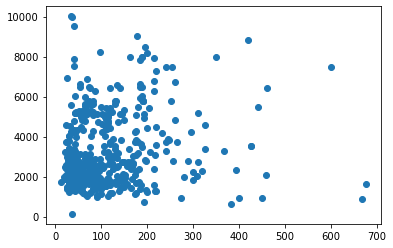

In [12]:
plt.scatter(X_model_test_1["surface_total_in_m2"],y_model_test_1)

In [13]:
X_model_train_1.columns

Index(['surface_total_in_m2', 'cochera', 'seguridad', 'parrilla', 'pileta',
       'gimnasio', 'acondicionado', 'terraza', 'lavadero', 'balcon', 'crimes',
       'dis_bancos', 'dis_clubes', 'dis_comisarias', 'dis_bomberos',
       'dis_colegios', 'dis_restaurants', 'dis_subtes', 'dis_gym',
       'dis_hospitales', 'dis_universidades', 'colectivos', 'dis_espver'],
      dtype='object')

In [14]:
#Creamos el modelo de Regresion Lineal
linreg_1 = LinearRegression()

In [15]:
#Entrenamos el modelo
linreg_1.fit(X_model_train_1, y_model_train_1)
lin_result = cross_val_score(linreg_1,X_model_train_1,y_model_train_1,cv=5)

In [16]:
# Imprimimos coeficientes
print (linreg_1.intercept_)
print (linreg_1.coef_)

1960.5643966195285
[ 2.74348592e-01  2.33640145e+02 -1.37366407e+01  2.36954510e+02
  4.29784930e+02  9.52775922e+01  1.34003335e+02  9.72590332e+01
 -6.61657767e+00 -1.20514960e+02 -8.39866359e-01 -8.57119317e-01
  4.94314805e-01  6.11903285e-01  9.76670844e-02  1.44239627e+00
 -2.56356152e-01  1.66147539e+00 -2.09943072e-01  3.53858728e-01
 -9.03844998e-02 -1.16043271e+01 -1.79026616e+00]


In [17]:
# Calculamos el R2

print("Score Train Lineal:", linreg_1.score(X_model_train_1, y_model_train_1))

# Calculamos el MSE

lmpred_Tr_1 = linreg_1.predict(X_model_train_1)

print("Train MSE lineal:", mean_squared_error(y_model_train_1,lmpred_Tr_1))
print("Cross Validation Training Scores:", lin_result)
print("media:", lin_result.mean(),"desviacion:",np.std(lin_result))

Score Train Lineal: 0.7339713400996759
Train MSE lineal: 791419.0866210542
Cross Validation Training Scores: [0.76476855 0.73582037 0.69404197 0.68303463 0.72725127]
media: 0.720983357332695 desviacion: 0.029470362007149926


In [18]:
# Calculamos el R2 de Test

print("Score Test Lineal:", linreg_1.score(X_model_test_1, y_model_test_1))

# Calculamos el MSE

lmpred_Te_1 = linreg_1.predict(X_model_test_1)

print("Test MSE lineal=", mean_squared_error(y_model_test_1,lmpred_Te_1))

Score Test Lineal: 0.7129957189398437
Test MSE lineal= 759735.7735514012


In [19]:
#Estandaricemos los valores para aplicar Lasso
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
X_st_1 = se.fit_transform(X_model_train_1)

In [20]:
#Proveemos alfas
myalphas_1_lasso = np.linspace(10,20,1000)
myalphas_1_ridge = np.linspace(10,200,1000)

In [21]:
#modellasso = Lasso()
#modellasso.fit(X_st,y_train)

In [22]:
#Apliquemos un modelo lasso con cross-validation para encontrar el mejor alfa
modellasso_1 = LassoCV(alphas=myalphas_1_lasso)
modelridge_1 = RidgeCV(alphas=myalphas_1_ridge)
modellasso_1.fit(X_st_1,y_model_train_1)
modelridge_1.fit(X_st_1,y_model_train_1)
lasso_results = cross_val_score(modellasso_1,X_st_1,y_model_train_1,cv=5,scoring='r2')
ridge_results = cross_val_score(modelridge_1,X_st_1,y_model_train_1,cv=5,scoring='r2')

In [23]:
#Veamos el alfa seleccionado por el modelo
print("Alfa Lasso",modellasso_1.alpha_)
print("Alfa Ridge",modelridge_1.alpha_)

Alfa Lasso 10.39039039039039
Alfa Ridge 48.608608608608606


In [24]:
#Veamos los coeficientes
pd.DataFrame({"Feat":feature_cols,"coef":modellasso_1.coef_}).sort_values(by="coef",ascending=False)

,Feat,coef
17,dis_subtes,590.615250
19,dis_hospitales,241.192347
15,dis_colegios,203.858564
4,pileta,193.301742
13,dis_comisarias,189.219586
12,dis_clubes,179.799860
1,cochera,110.385964
3,parrilla,73.064731
6,acondicionado,39.949695
7,terraza,28.679579


In [25]:
#Estandaricemos los valores de Test
X_st_test_1 = se.fit_transform(X_model_test_1)

In [26]:
# Calculamos el R2 de la regresion Lineal

lmpred_lasso_Te_1 = modellasso_1.predict(X_st_test_1)
lmpred_ridge_Te_1 = modelridge_1.predict(X_st_test_1)
print("Score Test Lasso:", r2_score(y_model_test_1,lmpred_lasso_Te_1))
print("Score Test Ridge:", r2_score(y_model_test_1,lmpred_ridge_Te_1))
# Calculamos el MSE

print("Test MSE Lasso", mean_squared_error(y_model_test_1,lmpred_lasso_Te_1))
print("CV Training Score Lasso:", lasso_results)
print("Lasso media:", lasso_results.mean(),"desviacion:",np.std(lasso_results))
print("Test MSE Ridge:", mean_squared_error(y_model_test_1,lmpred_ridge_Te_1))
print("CV Training Score Ridge:", ridge_results)
print("Ridge media:", ridge_results.mean(),"desviacion:",np.std(ridge_results))

Score Test Lasso: 0.7126708782010522
Score Test Ridge: 0.7125018166123374
Test MSE Lasso 760595.667100916
CV Training Score Lasso: [0.76098692 0.73863207 0.69784286 0.68341423 0.72585979]
Lasso media: 0.7213471743420554 desviacion: 0.027863245117162344
Test MSE Ridge: 761043.1940033222
CV Training Score Ridge: [0.76036328 0.73824368 0.69382996 0.68571234 0.72827164]
Ridge media: 0.7212841769565038 desviacion: 0.02786652326022819


In [27]:
modellasso_1.coef_

array([  15.14654049,  110.38596362,    0.        ,   73.06473079,
        193.30174186,   25.25561905,   39.94969484,   28.67957938,
         -0.        ,  -45.76054377, -188.72024593, -102.8346448 ,
        179.79986016,  189.21958573,   24.15925735,  203.85856378,
        -64.72460943,  590.61525005,  -23.3803814 ,  241.19234673,
         -0.        , -281.97898065, -169.91349684])

In [28]:
#Definamos un polinomio de Features de grado 2
poly = PolynomialFeatures(interaction_only=False)
poly_x_train_1 = poly.fit_transform(X_model_train_1)
poly_x_test_1 = poly.transform(X_model_test_1)

In [29]:
#Hagamos la regresion lineal del polinomio
linregpoly_1 = LinearRegression()
linregpoly_1.fit(poly_x_train_1, y_model_train_1)
linpoly_result = cross_val_score(linregpoly_1,poly_x_train_1,y_model_train_1,cv=5)

In [30]:
# Calculamos el R2 de la Regresion Lineal

print("Score Train Lineal:", linregpoly_1.score(poly_x_train_1, y_model_train_1))

# Calculamos el MSE

lmpred_Tr_1 = linregpoly_1.predict(poly_x_train_1)

print("Train MSE lineal=", mean_squared_error(y_model_train_1,lmpred_Tr_1))
print("Cross Validation Training Score:", linpoly_result)
print("media:", linpoly_result.mean(),"desviacion:",np.std(linpoly_result))

Score Train Lineal: 0.8641810541030561
Train MSE lineal= 404053.10521004786
Cross Validation Training Score: [0.72401629 0.68215072 0.75283826 0.60736167 0.68988442]
media: 0.6912502732075914 desviacion: 0.04896663345421448


In [31]:
# Calculamos el R2 de la Regresion Lineal de Test

print("Score Test Lineal Polinomio:", linregpoly_1.score(poly_x_test_1, y_model_test_1))

# Calculamos el MSE

lmpred_Te_1 = linregpoly_1.predict(poly_x_test_1)

print("Test MSE lineal Polinomio:", mean_squared_error(y_model_test_1,lmpred_Te_1))

Score Test Lineal Polinomio: 0.701565463527678
Test MSE lineal Polinomio: 789993.0711268046


In [32]:
#Estandaricemos el polinomio
se = StandardScaler()
poly_x_st_1_lasso = se.fit_transform(poly_x_train_1)
poly_x_st_1_ridge = se.fit_transform(poly_x_train_1)

In [33]:
#Probemos alfas
myalphas2_1_lasso = np.linspace(10,15,1000)
myalphas2_1_ridge = np.linspace(80,200,1000)

In [34]:
#modellasso = Lasso()
#modellasso.fit(X_st,y_train)

In [35]:
#Generemos un modelo Lasso para el polinomio con cross-validation
modellassopoly_1 = LassoCV(alphas=myalphas2_1_lasso)
modelridgepoly_1 = RidgeCV(alphas=myalphas2_1_ridge)
modellassopoly_1.fit(poly_x_st_1_lasso,y_model_train_1)
modelridgepoly_1.fit(poly_x_st_1_ridge,y_model_train_1)
polylasso_results = cross_val_score(modellassopoly_1,poly_x_st_1_lasso,y_model_train_1,cv=5,scoring='r2')
polyridge_results = cross_val_score(modelridgepoly_1,poly_x_st_1_ridge,y_model_train_1,cv=5,scoring='r2')
print("Lasso media:", polylasso_results.mean(),"desviacion:",np.std(polylasso_results))
print("Ridge media:", polyridge_results.mean(),"desviacion:",np.std(polyridge_results))

Lasso media: 0.7752434144274596 desviacion: 0.03433150807801081
Ridge media: 0.7741584891328961 desviacion: 0.03825148104367176


In [36]:
#El mejor alfa fue
print("Alfa Lasso",modellassopoly_1.alpha_)
print("Alfa Ridge",modelridgepoly_1.alpha_)

Alfa Lasso 10.0
Alfa Ridge 129.24924924924926


In [37]:
#Definamos una funcion para verificar que todos los features del polinomio sirven
def quetiene(features,df):
    for feat in features:
        print("tiene "+feat+":", df.feats.str.contains(feat).unique())


In [38]:
#Seleccionemos los Features del polinomio que no son 0
df_coefs_1 = pd.DataFrame({"coefs":modellassopoly_1.coef_,"feats":poly.get_feature_names(X_model_train_1.columns)})
df_coef_1_nz=df_coefs_1[(df_coefs_1["coefs"]<-0.0001) | (df_coefs_1["coefs"]>0.0001)]
#pd.DataFrame({'coef':abs(modellassopoly_1.coef_), 'name':X_model_train_1.columns}).sort_values(by="coef",ascending=False)
df_coef_1_nz.sort_values(by="coefs",ascending=False).head(10)

,coefs,feats
239,529.504678,dis_clubes dis_subtes
18,282.318934,dis_subtes
39,272.878622,surface_total_in_m2 dis_colegios
279,191.703942,dis_subtes^2
174,191.301719,terraza dis_subtes
125,174.309480,pileta dis_hospitales
281,169.985721,dis_subtes dis_hospitales
24,163.436657,surface_total_in_m2^2
37,155.363615,surface_total_in_m2 dis_comisarias
127,119.976937,pileta colectivos


In [39]:
df_coef_1_nz.sort_values(by="coefs",ascending=True).head(10)

,coefs,feats
216,-265.157016,crimes dis_subtes
45,-156.546617,surface_total_in_m2 colectivos
248,-152.549539,dis_comisarias dis_restaurants
40,-141.256116,surface_total_in_m2 dis_restaurants
203,-140.780483,balcon dis_subtes
284,-136.993269,dis_subtes dis_espver
46,-108.810174,surface_total_in_m2 dis_espver
229,-103.922989,dis_bancos dis_gym
280,-95.919527,dis_subtes dis_gym
84,-93.883672,seguridad dis_subtes


In [40]:
#Observemos si hay Features de base del polinomio que no se utilicen, si fuesen solo False podrian descartarse
feat_ls = ['surface_total_in_m2','cochera','seguridad',
              'parrilla','pileta','gimnasio','acondicionado','terraza','lavadero','balcon',
              'crimes','dis_bancos','dis_clubes','dis_comisarias','dis_bomberos','dis_colegios',
              'dis_restaurants','dis_subtes','dis_gym','dis_hospitales','dis_universidades','colectivos','dis_espver']
quetiene(feat_ls,df_coef_1_nz)

tiene surface_total_in_m2: [False  True]
tiene cochera: [False  True]
tiene seguridad: [False  True]
tiene parrilla: [False  True]
tiene pileta: [False  True]
tiene gimnasio: [False  True]
tiene acondicionado: [False  True]
tiene terraza: [False  True]
tiene lavadero: [False  True]
tiene balcon: [False  True]
tiene crimes: [False  True]
tiene dis_bancos: [False  True]
tiene dis_clubes: [False  True]
tiene dis_comisarias: [False  True]
tiene dis_bomberos: [False  True]
tiene dis_colegios: [False  True]
tiene dis_restaurants: [False  True]
tiene dis_subtes: [ True False]
tiene dis_gym: [False  True]
tiene dis_hospitales: [False  True]
tiene dis_universidades: [False  True]
tiene colectivos: [False  True]
tiene dis_espver: [False  True]


In [41]:
#Estandaricemos los valores Test
poly_X_st_test_1 = se.fit_transform(poly_x_test_1)

In [42]:
# Calculamos el R2 Lasso de Test

lmpred_lasso_poly_Te_1 = modellassopoly_1.predict(poly_X_st_test_1)
lmpred_ridge_poly_Te_1 = modelridgepoly_1.predict(poly_X_st_test_1)
print("Score Test Lasso Polinomio:", r2_score(y_model_test_1,lmpred_lasso_poly_Te_1))
print("Score Test Ridge Polinomio:", r2_score(y_model_test_1,lmpred_ridge_poly_Te_1))

# Calculamos el MSE

print("Test MSE Lasso Polinomio:", mean_squared_error(y_model_test_1,lmpred_lasso_poly_Te_1))
print("Test MSE Ridge Polinomio:", mean_squared_error(y_model_test_1,lmpred_ridge_poly_Te_1))

Score Test Lasso Polinomio: 0.7827687493079011
Score Test Ridge Polinomio: 0.7764625391199568
Test MSE Lasso Polinomio: 575037.9460350558
Test MSE Ridge Polinomio: 591731.2631438392


In [43]:
def proba_model(semillas):
    scores=[]
    for s in semillas:      
        X_tr_52, X_te_52, y_tr_52, y_te_52 = train_test_split(df1, df1, test_size=0.3, random_state=s)
        X_model_test_52 = X_te_52[feature_cols]
        y_model_test_52 = y_te_52["price_usd_per_m2"]
        poly_x_52 = poly.fit_transform(X_model_test_52)
        poly_x_test_52 = se.transform(poly_x_52)
        lmpred_lasso_poly_Te_52 = modellassopoly_1.predict(poly_x_test_52)
        #print("Score Lasso ",s,":", r2_score(y_model_test_52,lmpred_lasso_poly_Te_52))
        scores.append(r2_score(y_model_test_52,lmpred_lasso_poly_Te_52))
        #print("Test MSE Lasso ",s,":", mean_squared_error(y_model_test_52,lmpred_lasso_poly_Te_52))
    print("Scores Media:",np.mean(scores))

In [44]:
'''pruebo con 100 semillas distintas el modelo para ver la performance real'''
semillas = np.random.randint(1,200,100)

In [45]:
proba_model(semillas)

Scores Media: 0.6951450085294256


In [46]:
'''Para la comuna 1 el polinomio con todas las variables dio mejor resultado que la regresion lineal simple'''

'Para la comuna 1 el polinomio con todas las variables dio mejor resultado que la regresion lineal simple'

In [47]:
'''Probemos por separado la influencia de los Features Endógenos y Exógenos'''
features_endogenos=['surface_total_in_m2','cochera','seguridad',
              'parrilla','pileta','gimnasio','acondicionado','terraza','lavadero','balcon']

features_exogenos=['crimes','dis_bancos','dis_clubes','dis_comisarias','dis_bomberos','dis_colegios',
              'dis_restaurants','dis_subtes','dis_gym','dis_hospitales','dis_universidades','colectivos','dis_espver']

X_model_train_1_endo = X_train_1[features_endogenos]
X_model_test_1_endo = X_te_1[features_endogenos]
X_model_train_1_exo = X_train_1[features_exogenos]
X_model_test_1_exo = X_te_1[features_exogenos]

y_model_train_1 = y_train_1["price_usd_per_m2"]
y_model_test_1 = y_te_1["price_usd_per_m2"]

In [48]:
#Definamos un polinomio de Features
poly = PolynomialFeatures(interaction_only=False)
poly_x_train_1_endo = poly.fit_transform(X_model_train_1_endo)
poly_x_test_1_endo = poly.transform(X_model_test_1_endo)
poly_x_train_1_exo = poly.fit_transform(X_model_train_1_exo)
poly_x_test_1_exo = poly.transform(X_model_test_1_exo)

In [49]:
#Hagamos la regresion lineal del polinomio
linregpoly_1_endo = LinearRegression()
linregpoly_1_exo = LinearRegression()
linregpoly_1_endo.fit(poly_x_train_1_endo, y_model_train_1)
linpoly_result_endo = cross_val_score(linregpoly_1_endo,poly_x_train_1_endo,y_model_train_1,cv=5)
linregpoly_1_exo.fit(poly_x_train_1_exo, y_model_train_1)
linpoly_result_exo = cross_val_score(linregpoly_1_exo,poly_x_train_1_exo,y_model_train_1,cv=5)

In [50]:
# Calculamos el R2 de la Regresion Lineal

print("Score Train Lineal Endógenos:", linregpoly_1_endo.score(poly_x_train_1_endo, y_model_train_1))
print("Score Train Lineal Exógenos:", linregpoly_1_exo.score(poly_x_train_1_exo, y_model_train_1))
# Calculamos el MSE

lmpred_Tr_1_endo = linregpoly_1_endo.predict(poly_x_train_1_endo)
lmpred_Tr_1_exo = linregpoly_1_exo.predict(poly_x_train_1_exo)

print("Train MSE lineal Endógenos:", mean_squared_error(y_model_train_1,lmpred_Tr_1_endo))
print("Train MSE lineal Exógenos", mean_squared_error(y_model_train_1,lmpred_Tr_1_exo))
print("CV Training Score Endógenos:", linpoly_result_endo)
print("CV Training Score Exógenos:", linpoly_result_exo)
print("Endógenos media:", linpoly_result_endo.mean(),"desviacion:",np.std(linpoly_result_endo))
print("Exógenos media:", linpoly_result_exo.mean(),"desviacion:",np.std(linpoly_result_exo))

Score Train Lineal Endógenos: 0.5503574919418278
Score Train Lineal Exógenos: 0.7934148833104888
Train MSE lineal Endógenos: 1337659.1197607473
Train MSE lineal Exógenos 614578.160192122
CV Training Score Endógenos: [0.44109251 0.58064874 0.42149787 0.46883633 0.51758888]
CV Training Score Exógenos: [0.79584007 0.7345689  0.78839197 0.70133381 0.74672776]
Endógenos media: 0.4859328626695036 desviacion: 0.05732018466448128
Exógenos media: 0.7533725009047976 desviacion: 0.03503030582711889


In [51]:
# Calculamos el R2 de la Regresion Lineal de Test

print("Score TestLineal Endógenos:", linregpoly_1_endo.score(poly_x_test_1_endo, y_model_test_1))
print("Score TestLineal Exógenos:", linregpoly_1_exo.score(poly_x_test_1_exo, y_model_test_1))
# Calculamos el MSE

lmpred_Te_1_endo = linregpoly_1_endo.predict(poly_x_test_1_endo)
lmpred_Te_1_exo = linregpoly_1_exo.predict(poly_x_test_1_exo)
print("Test MSE lineal Endógenos", mean_squared_error(y_model_test_1,lmpred_Te_1_endo))
print("Test MSE lineal Exógenos:", mean_squared_error(y_model_test_1,lmpred_Te_1_exo))

Score TestLineal Endógenos: 0.3527060146153026
Score TestLineal Exógenos: 0.7539437086239182
Test MSE lineal Endógenos 1713467.1123541067
Test MSE lineal Exógenos: 651341.3882722335


In [52]:
#Estandaricemos el polinomio
se = StandardScaler()
poly_x_st_1_endo = se.fit_transform(poly_x_train_1_endo)
poly_x_st_1_exo = se.fit_transform(poly_x_train_1_exo)

In [53]:
#Probemos alfas
myalphas2_1_endo = np.linspace(4,10,1000)
myalphas2_1_exo = np.linspace(3.8,4.5,1000)

In [54]:
#modellasso = Lasso()
#modellasso.fit(X_st,y_train)

In [55]:
#Generemos un modelo Lasso para el polinomio con cross-validation
modellassopoly_1_endo = LassoCV(alphas=myalphas2_1_endo)
modellassopoly_1_exo = LassoCV(alphas=myalphas2_1_exo)
modellassopoly_1_endo.fit(poly_x_st_1_endo,y_model_train_1)
modellassopoly_1_exo.fit(poly_x_st_1_exo,y_model_train_1)
polylasso_results_endo = cross_val_score(modellassopoly_1_endo,poly_x_st_1_endo,y_model_train_1,cv=5,scoring='r2')
polylasso_results_exo = cross_val_score(modellassopoly_1_exo,poly_x_st_1_exo,y_model_train_1,cv=5,scoring='r2')
print("Endógenos media:", polylasso_results_endo.mean(),"desviacion:",np.std(polylasso_results_endo))
print("Exógenos media:", polylasso_results_exo.mean(),"desviacion:",np.std(polylasso_results_exo))

C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249355.4276623726, tolerance: 345808.63753994304
  tol, rng, random, positive)
C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1474926.5131635666, tolerance: 352681.3710587428
  tol, rng, random, positive)
C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1143305.3822102547, tolerance: 349619.0021486525
  tol, rng, random, positive)
C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not conver

C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541466.7593541145, tolerance: 280100.19530713215
  tol, rng, random, positive)
C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 637005.1084508896, tolerance: 277662.3277192729
  tol, rng, random, positive)
C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317985.3126313686, tolerance: 271221.1129060586
  tol, rng, random, positive)


Endógenos media: 0.490893203228319 desviacion: 0.051830783734106683
Exógenos media: 0.752341692808887 desviacion: 0.027476356378894617


C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5083319.4724577665, tolerance: 341892.1391185213
  positive)


In [56]:
#El mejor alfa fue
print("Alfa Endógenos:", modellassopoly_1_endo.alpha_)
print("Alfa Exógenos:", modellassopoly_1_exo.alpha_)

Alfa Endógenos: 5.141141141141141
Alfa Exógenos: 3.8


In [57]:
#modellassopoly_1.coef_

In [58]:
#Estandaricemos los valores Test
poly_X_st_test_1_endo = se.fit_transform(poly_x_test_1_endo)
poly_X_st_test_1_exo = se.fit_transform(poly_x_test_1_exo)

In [59]:
# Calculamos el R2 Lasso de Test

lmpred_lasso_poly_Te_1_endo = modellassopoly_1_endo.predict(poly_X_st_test_1_endo)
lmpred_lasso_poly_Te_1_exo = modellassopoly_1_exo.predict(poly_X_st_test_1_exo)
print("Endógenos Score Test Lasso:", r2_score(y_model_test_1,lmpred_lasso_poly_Te_1_endo))
print("Exógenos Score Test Lasso:", r2_score(y_model_test_1,lmpred_lasso_poly_Te_1_exo))

# Calculamos el MSE

print("Endógenos Test MSE Lasso=", mean_squared_error(y_model_test_1,lmpred_lasso_poly_Te_1_endo))
print("Exógenos Test MSE Lasso=", mean_squared_error(y_model_test_1,lmpred_lasso_poly_Te_1_exo))

Endógenos Score Test Lasso: 0.4082596285085831
Exógenos Score Test Lasso: 0.7464255210347233
Endógenos Test MSE Lasso= 1566409.8361738226
Exógenos Test MSE Lasso= 671242.9592267947


In [60]:
'''En Vista a los datos, parecería que los Features exógenos explican en mayor proporción el precio por m2,
es decir que hay una mayor dependencia a la localización de la propiedad frente a las características particulares
de la propiedad, Siendo la proporción el doble aproximadamente.
Se podría decir que las características endógenas son derivables de las caracteristicas inherentes a la ubicación '''

'En Vista a los datos, parecería que los Features exógenos explican en mayor proporción el precio por m2,\nes decir que hay una mayor dependencia a la localización de la propiedad frente a las características particulares\nde la propiedad, Siendo la proporción el doble aproximadamente.\nSe podría decir que las características endógenas son derivables de las caracteristicas inherentes a la ubicación '